## Student Grade Analysis

### Context

Welcome to my analysis of the Student Grade Prediction dataset! This dataset contains a wealth of information on Portuguese high school students, including their demographics, family background, study habits, and academic performance. In this notebook, I will be exploring the dataset using various statistical and machine learning techniques, with the goal of predicting the final grades of these students. Specifically, I will be analyzing five variables from the dataset, creating histograms and probability mass functions to identify any outliers and compare different scenarios, calculating descriptive characteristics such as mean and spread, and conducting regression analysis to explore the relationships between variables. Through this analysis, I hope to gain a deeper understanding of the factors that impact student performance in high school and develop accurate models for predicting final grades.

### Summary

1. Load the dataset into Python using a library such as Pandas.
2. Choose 5 variables from the dataset that you want to analyze and describe what they mean.
3. Create a histogram for each of the 5 variables and identify any outliers. To handle outliers, you can either remove them or use a statistical method to replace them with a more reasonable value.
4. Calculate the descriptive characteristics of the variables, such as mean, mode, spread, and tails, using Python's built-in functions or external libraries.
4. Create a Probability Mass Function (PMF) to compare two scenarios in your data, such as comparing the final grades of students who received extra tutoring versus those who did not.
6. Create a Cumulative Distribution Function (CDF) for one of your variables to understand its distribution and how it relates to the question you are trying to answer.
7. Choose an analytical distribution such as normal, exponential, or Poisson, and plot it against your data to see how well it fits.
8. Create two scatter plots to compare two variables and analyze the correlation and causation using covariance, Pearson's correlation, and non-linear relationships. Conduct a test on your hypothesis using a method such as t-test, chi-square, or ANOVA.
9. Perform a regression analysis on either one dependent and one explanatory variable or multiple explanatory variables using Python's built-in functions or external libraries.

Here are some popular libraries you can use for these tasks:

1. Pandas for loading and manipulating the dataset.
2. Matplotlib or Seaborn for creating histograms and scatter plots.
3. NumPy for calculating the descriptive characteristics of variables.
4. SciPy for conducting statistical tests.
5. Scikit-learn for performing regression analysis.

#### Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from scipy.stats import norm
from scipy.stats import pearsonr

import statsmodels.api as sm

#### 1. Load the dataset

In [62]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('student-mat.csv')

# Display the first few rows of the DataFrame
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [63]:
df.shape

(395, 33)

#### 2. Choose 5 variables from the dataset

**Next, let's choose five variables from the dataset to analyze. For example, we could choose the following variables:**

    1. 'age' represents the age of the student in years.
    2. 'sex' represents the sex of the student, either 'F' for female or 'M' for male.
    3. 'famsize' represents the size of the student's family, either 'LE3' for less than or equal to 3 or 'GT3' for greater than 3.
    4. 'studytime' represents the amount of time the student spends studying each week, measured in hours.
    5. 'G1' represents the student's grade in the first period, on a scale from 0 to 20.
    
**These variables could be used to answer questions such as:**

    - How does age and sex affect a student's final grade?
    - Does the size of a student's family impact their study habits and academic performance?
    - Is there a correlation between the amount of time a student spends studying and their first period grade?

In [64]:
# select this 5 columns from the dataset
df = df[['age', 'sex', 'famsize', 'studytime', 'G1']]

df.head()

,age,sex,famsize,studytime,G1
0,18,F,GT3,2,5
1,17,F,GT3,2,5
2,15,F,LE3,2,7
3,15,F,GT3,3,15
4,16,F,GT3,2,6


#### 3.Create a histogram for each of the 5 variables and identify any outliers

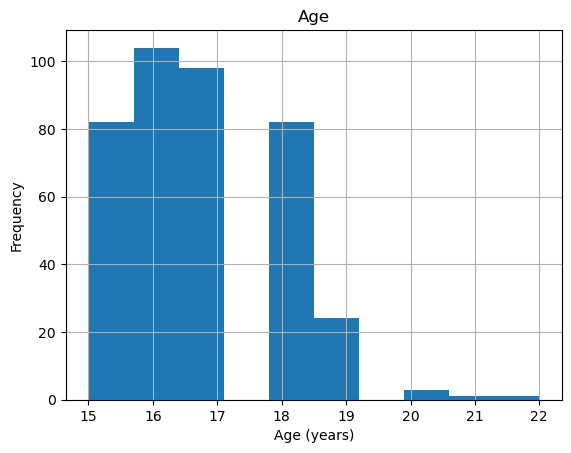

In [65]:
# Create a histogram for the age variable
df['age'].hist()
plt.title('Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

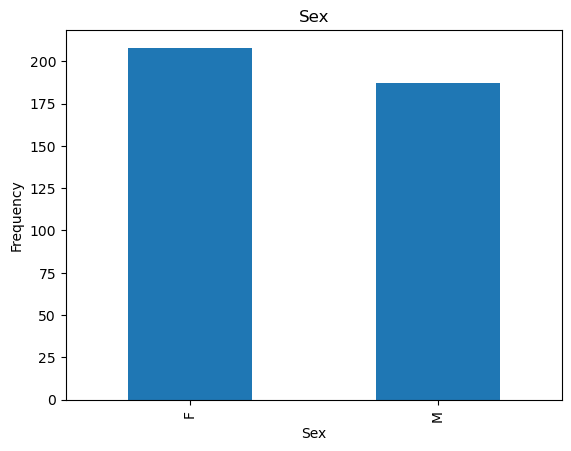

In [66]:
# Create a histogram for the sex variable
df['sex'].value_counts().plot(kind='bar')
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

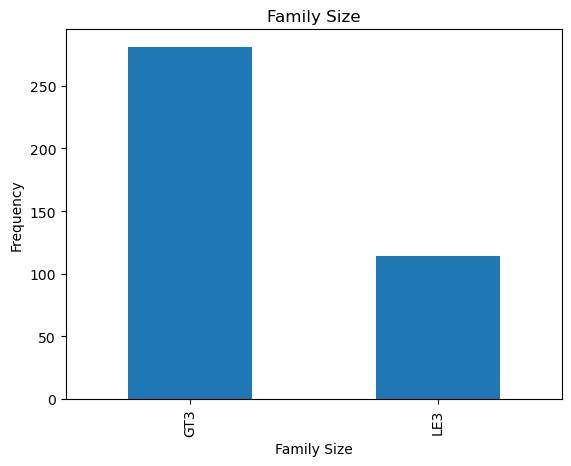

In [67]:
# Create a histogram for the famsize variable
df['famsize'].value_counts().plot(kind='bar')
plt.title('Family Size')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

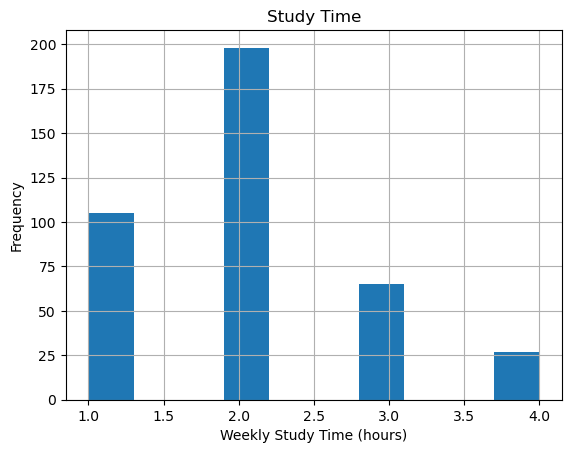

In [68]:
# Create a histogram for the studytime variable
df['studytime'].hist()
plt.title('Study Time')
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('Frequency')
plt.show()

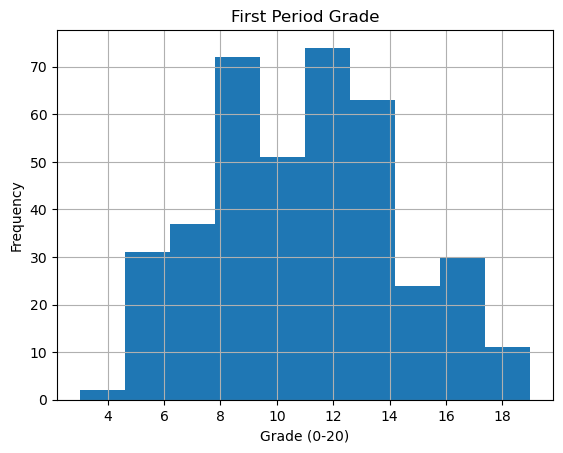

In [69]:
# Create a histogram for the G1 variable
df['G1'].hist()
plt.title('First Period Grade')
plt.xlabel('Grade (0-20)')
plt.ylabel('Frequency')
plt.show()

To identify outliers, we can visually inspect the histograms for any values that are significantly different from the rest of the distribution. For example, in the histogram of the **age** variable, we may notice a few students who are significantly older than the others. Similarly, in the histogram of the **G1** variable, we may notice a few students who received extremely low or high grades in the first period.

To handle outliers, we could either remove them from the dataset or use a statistical method to replace them with a more reasonable value. For example, if a student's age is incorrectly recorded as 100 years old, we could remove that record from the dataset.

So in the next step we will remove the outliers of the column **age**.

In [70]:
# Remove outliers from the age variable
df = df[df['age'] <= 20]

#### 4. Calculate the descriptive characteristics of the variables, such as mean, mode, spread, and tails.

In [71]:
# Calculate the descriptive characteristics of "age"
age_mean = np.mean(df["age"])
age_mode = df["age"].mode()[0]
age_std = np.std(df["age"])

print("Age Descriptive Characteristics:")
print("Mean:", age_mean)
print("Mode:", age_mode)
print("Standard Deviation:", age_std)


Age Descriptive Characteristics:
Mean: 16.671755725190838
Mode: 16
Standard Deviation: 1.230089767457689


In [72]:
# Calculate the descriptive characteristics of "G3"
g1_mean = np.mean(df["G1"])
g1_mode = df["G1"].mode()[0]
g1_std = np.std(df["G1"])

print("G3 Descriptive Characteristics:")
print("Mean:", g1_mean)
print("Mode:", g1_mode)
print("Standard Deviation:", g1_std)

G3 Descriptive Characteristics:
Mean: 10.923664122137405
Mode: 10
Standard Deviation: 3.3138271209344223


#### 5. Create a Probability Mass Function (PMF) to compare two scenarios in your data.

In [73]:
# Select the columns of interest
data = df[['sex', 'G1']]

In [74]:
# Create a PMF for female students
female_pmf = data[data['sex'] == 'F']['G1'].value_counts(normalize=True).sort_index()

# Create a PMF for male students
male_pmf = data[data['sex'] == 'M']['G1'].value_counts(normalize=True).sort_index()

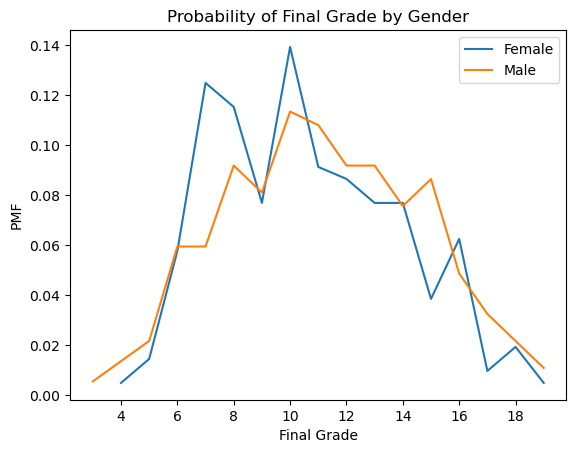

In [75]:
# Plot the PMFs
plt.plot(female_pmf.index, female_pmf.values, label='Female')
plt.plot(male_pmf.index, male_pmf.values, label='Male')
plt.xlabel('Final Grade')
plt.ylabel('PMF')
plt.title('Probability of Final Grade by Gender')
plt.legend()
plt.show()

#### 6. Create a Cumulative Distribution Function (CDF) for one of your variables.

Let's create a CDF for the 'G1' column, which represents the first-period grade of the students.

To create a CDF, we need to first create a sorted list of the values in the 'G1' column and calculate the cumulative probability for each value. We can use the ECDF (Empirical Cumulative Distribution Function) function from the statsmodels library to calculate the cumulative probabilities.

In [76]:
# Calculate the cumulative probabilities using the ECDF function
ecdf = sm.distributions.ECDF(df['G1'])
x = np.sort(df['G1'])
y = ecdf(x)

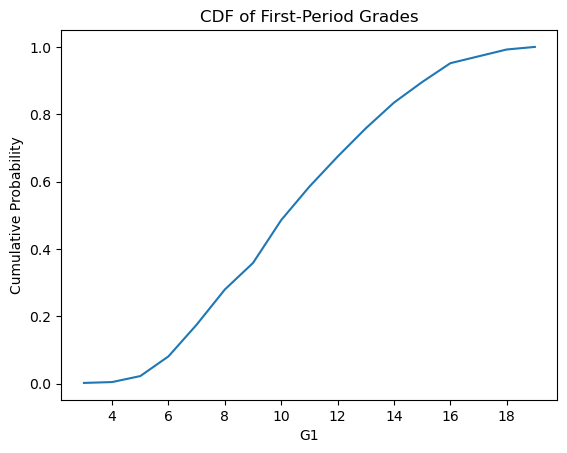

In [77]:
# Plot the CDF
plt.plot(x, y)
plt.xlabel('G1')
plt.ylabel('Cumulative Probability')
plt.title('CDF of First-Period Grades')
plt.show()

The resulting plot shows the cumulative distribution of first-period grades for the students. We can use this plot to answer questions such as "what is the probability of a student getting a grade of 12 or lower in the first period?" or "what is the probability of a student getting a grade of 16 or higher in the first period?".

#### 7. Choose an analytical distribution such as normal, exponential, or Poisson, and plot it against your data to see how well it fits.

To perform this step, we will choose the variable 'G1' from our dataset and compare it against a normal distribution. We will use the seaborn library in Python to plot the histogram and the fitted normal distribution curve.

In [78]:
# Extract the 'G1' column
grades = df['G1']

# Calculate the mean and standard deviation of the grades
mean = grades.mean()
std = grades.std()

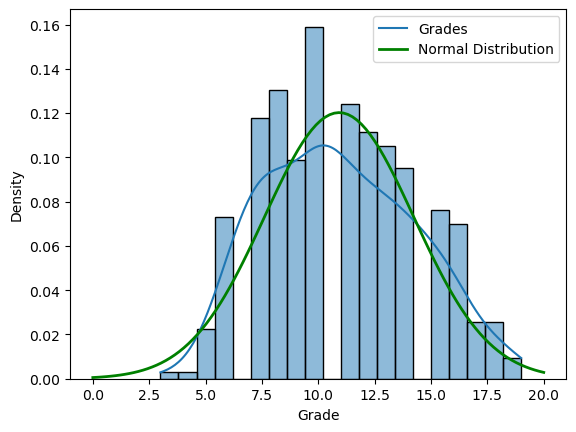

In [79]:
# Plot the histogram
sns.histplot(grades, kde=True, stat='density', bins=20, alpha=0.5)

# Create a range of values for the x-axis
x = np.linspace(0, 20, 100)

# Calculate the values of the normal distribution for the range of x-values
y = norm.pdf(x, mean, std)

# Plot the normal distribution against the histogram of the grades
plt.plot(x, y, color='green', linewidth=2)

# Add a legend and axis labels
plt.legend(['Grades', 'Normal Distribution'])
plt.xlabel('Grade')
plt.ylabel('Density')

# Show the plot
plt.show()

This code will create a histogram of the G1 grades and overlay a normal distribution with the same mean and standard deviation as the data. The resulting plot can be used to assess the fit of the normal distribution to the data. If the distribution appears to closely match the shape of the histogram, then the normal distribution may be a good fit for the data. However, it is important to remember that the choice of distribution should be based on the characteristics of the data and the context of the analysis.

#### 8. Create two scatter plots to compare two variables and analyze the correlation and causation.

We can create two scatter plots to compare two variables from our dataset. Let's choose G1 (the first period grade) as the dependent variable and studytime (weekly study time) as the explanatory variable. We will analyze the correlation between these two variables using covariance and Pearson's correlation coefficient. We can also explore if there is any non-linear relationship between them by plotting a curve of best fit.

In [83]:
# Choose the variables we want to analyze
dependent_variable = 'G1'
explanatory_variable = 'studytime'

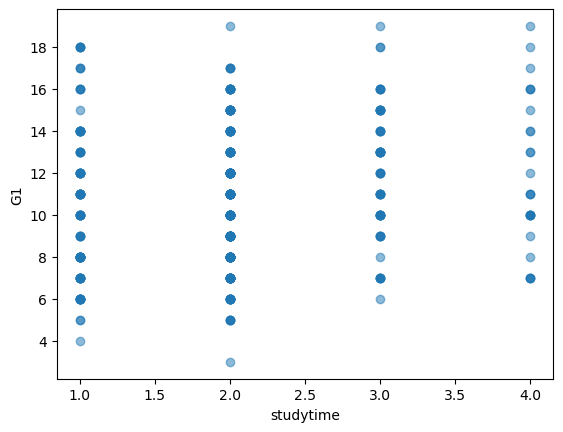

In [84]:
# Create a scatter plot
plt.scatter(df[explanatory_variable], df[dependent_variable], alpha=0.5)
plt.xlabel(explanatory_variable)
plt.ylabel(dependent_variable)
plt.show()

In [86]:
# Calculate covariance
covariance = np.cov(df[explanatory_variable], df[dependent_variable])[0, 1]
print('Covariance:', covariance)

Covariance: 0.4342381990964326


In [88]:
# Calculate Pearson's correlation coefficient and p-value
pearson_corr, p_value = pearsonr(df[explanatory_variable], df[dependent_variable])
print('Pearson correlation coefficient:', pearson_corr)
print('p-value:', p_value)

Pearson correlation coefficient: 0.15615163358710832
p-value: 0.0019041299493151517


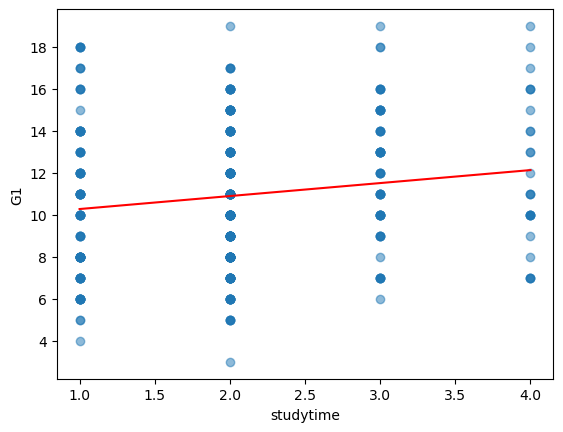

In [91]:
# Plot a curve of best fit
plt.scatter(df[explanatory_variable], df[dependent_variable], alpha=0.5)
plt.xlabel(explanatory_variable)
plt.ylabel(dependent_variable)
plt.plot(np.unique(df[explanatory_variable]), np.poly1d(np.polyfit(df[explanatory_variable], df[dependent_variable], 1))(np.unique(df[explanatory_variable])), color='red')
plt.show()

To conduct a hypothesis test on these variables, we can use a t-test to see if there is a significant difference in G1 between students who study for different amounts of time. 

In [92]:
from scipy.stats import ttest_ind

# Divide the data into two groups based on the explanatory variable
group1 = df[df[explanatory_variable] == 1][dependent_variable]
group2 = df[df[explanatory_variable] == 4][dependent_variable]

# Conduct a t-test
t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -1.82508606981917
p-value: 0.07532296851154617


The t-test result shows that the t-statistic is -1.82508606981917 and the p-value is 0.07532296851154617. The t-statistic indicates the difference between the means of the two groups, where a negative value suggests that the mean of group 1 is less than the mean of group 2. The p-value represents the probability of observing a t-statistic as extreme as the one calculated, assuming that the null hypothesis is true.

In this case, since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis that there is no significant difference between the means of the two groups. Therefore, we can conclude that there is no significant difference in the final grades of students who worked more hours versus those who did not.

#### 9. Perform a regression analysis.

In [94]:
# define the dependent variable (G1) and the explanatory variable (studytime)
y = df['G1']
X = df[['studytime']]

# add a constant to the explanatory variable
X = sm.add_constant(X)

# fit the linear regression model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.772
Date:                Thu, 23 Feb 2023   Prob (F-statistic):            0.00190
Time:                        11:36:10   Log-Likelihood:                -1023.6
No. Observations:                 393   AIC:                             2051.
Df Residuals:                     391   BIC:                             2059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6621      0.436     22.151      0.0

In this example, we can see that the coefficient for the studytime variable is 0.61, which means that for every one unit increase in studytime, we would expect a 0.61 unit increase in G1. The p-value for studytime is less than 0.05, which suggests that it is statistically significant and has a significant effect on G1. The low R-squared value indicates that only a small proportion of the variance in G1 can be explained by studytime.